# Guided Project: Popular Data Science Questions

We are finally ready to explore date from the outside of DataQuest! In this project we will explore Stack Exchange Data Science questions answering the question "What is it that people want to learn about in data science?".

In [1]:
import requests
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Getting and Exploring the Data

Stack Exchange provides several ways of extracting data:

* **API**: Retrieve paginated data with GET request in json
* **Data Explorer**: Build T-SQL like queries using web interface and download results in csv

DataQuest suggests us to use Data Explorer, but I ~~am above it~~ find it impractical due the lack of fetch automation and making requests from code.

### [Stack Exchange API](https://api.stackexchange.com/docs/questions)

The maximum page size for Stack Exchange API request is 100 entries. In order to download all the pages we need to do this sequentially.

* 100 questions = 1 request
* 1.000 questions = 10 requests
* 10.000 questions = 100 requests

It is worth to mention that we need to keep in mind [API Rate Limiting](https://api.stackexchange.com/docs/throttle).

* Max requests per day per IP = 10.000
* Max requests per second per IP = 30

In [2]:
def get_questions_page(page=1):
    return requests.get('https://api.stackexchange.com/2.2/questions', params={
        'page': page
        ,'pagesize': 100
        ,'fromdate': 1546300800 # 2019-01-01
        ,'todate': 1577836800 # 2020-01-01
        ,'order': 'desc'
        ,'sort': 'creation'
        ,'site': 'datascience'
        ,'filter': '!)r_ttsCTOhb*c)Yfkb)B'
    }).json()

def get_all_questions():
    page = 0
    questions = []
    has_more=True
    
    while has_more:
        page += 1
        questions_page = get_questions_page(page)
        questions.extend(questions_page['items'])
        has_more = questions_page['has_more']
        total_pages = round(questions_page['total'] // 100) + 1
        print('Loaded page: ', page, '/',  total_pages)
    
    return questions

In [3]:
questions = get_all_questions()
df = pd.DataFrame(questions)
df['creation_date'] = df['creation_date'].apply(dt.date.fromtimestamp).astype('datetime64[ns]')

Loaded page:  1 / 68
Loaded page:  2 / 68
Loaded page:  3 / 68
Loaded page:  4 / 68
Loaded page:  5 / 68
Loaded page:  6 / 68
Loaded page:  7 / 68
Loaded page:  8 / 68
Loaded page:  9 / 68
Loaded page:  10 / 68
Loaded page:  11 / 68
Loaded page:  12 / 68
Loaded page:  13 / 68
Loaded page:  14 / 68
Loaded page:  15 / 68
Loaded page:  16 / 68
Loaded page:  17 / 68
Loaded page:  18 / 68
Loaded page:  19 / 68
Loaded page:  20 / 68
Loaded page:  21 / 68
Loaded page:  22 / 68
Loaded page:  23 / 68
Loaded page:  24 / 68
Loaded page:  25 / 68
Loaded page:  26 / 68
Loaded page:  27 / 68
Loaded page:  28 / 68
Loaded page:  29 / 68
Loaded page:  30 / 68
Loaded page:  31 / 68
Loaded page:  32 / 68
Loaded page:  33 / 68
Loaded page:  34 / 68
Loaded page:  35 / 68
Loaded page:  36 / 68
Loaded page:  37 / 68
Loaded page:  38 / 68
Loaded page:  39 / 68
Loaded page:  40 / 68
Loaded page:  41 / 68
Loaded page:  42 / 68
Loaded page:  43 / 68
Loaded page:  44 / 68
Loaded page:  45 / 68
Loaded page:  46 / 

In [4]:
df.head()

,creation_date,favorite_count,question_id,score,tags,view_count
0,2019-12-31,1,65671,1,"[deep-learning, hyperparameter, hyperparameter...",93
1,2019-12-31,0,65667,1,[bayesian],29
2,2019-12-31,0,65666,1,"[machine-learning, scikit-learn, cross-validat...",271
3,2019-12-31,0,65664,1,"[neural-network, deep-learning, classification...",1390
4,2019-12-31,0,65663,3,[information-retrieval],54


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6781 entries, 0 to 6780
Data columns (total 6 columns):
creation_date     6781 non-null datetime64[ns]
favorite_count    6781 non-null int64
question_id       6781 non-null int64
score             6781 non-null int64
tags              6781 non-null object
view_count        6781 non-null int64
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 317.9+ KB


### [Stack Exchange Data Explorer](https://data.stackexchange.com/datascience/)

```sql
select
  p.Id
  ,p.CreationDate
  ,p.Score
  ,p.ViewCount
  ,p.Tags
  ,p.AnswerCount
  ,p.FavoriteCount
from Posts p join PostTypes pt on pt.Id = p.PostTypeId
where pt.Name = 'Question' and year(p.CreationDate) = 2019
```

In [6]:
df = pd.read_csv('https://data.stackexchange.com/datascience/csv/1674454', parse_dates=['CreationDate'])

In [7]:
df.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,60513,2019-09-20 17:35:23,1,24,<orange><orange3>,0,NaN
1,60520,2019-09-20 19:20:41,2,191,<machine-learning><scikit-learn><multiclass-cl...,2,1.0
2,60522,2019-09-20 21:05:01,0,30,<machine-learning><image-recognition><image-pr...,1,NaN
3,60527,2019-09-20 22:45:12,0,123,<machine-learning><feature-selection><random-f...,2,NaN
4,60528,2019-09-20 23:13:52,2,19,<numpy><matplotlib>,0,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6781 entries, 0 to 6780
Data columns (total 7 columns):
Id               6781 non-null int64
CreationDate     6781 non-null datetime64[ns]
Score            6781 non-null int64
ViewCount        6781 non-null int64
Tags             6781 non-null object
AnswerCount      6781 non-null int64
FavoriteCount    1579 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 370.9+ KB


### We need MORE DATA

Using approaches above we can retrieve ~6.7k records for 2019 year (fetching in 2021). This is a bit less than DataQuest has prepared for us in the `2019_questions.csv` file. I suppose that a lot of questions was deleted :c. Let's stick to DataQuest csv file as it includes more data.

In [9]:
df = pd.read_csv('2019_questions.csv', parse_dates=['CreationDate'])

In [10]:
df.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


## Cleaning the Data

First of all, we need to think what data structures we need for our task and implement general transformations.

1. Fill missing FavoriteCount values with zero
2. Split string tags into lists for better structure
3. Create an unpivoted DataFrame with single Tag column
    * Group by Tag for Most Used and Most Viewed analysis
    * Pivot by ID for determining Tags relations

In [12]:
df['FavoriteCount'] = df['FavoriteCount'].fillna(0)

In [13]:
df['Tags'] = df['Tags'].str[1:-1].str.split('><')

In [14]:
pd.__version__

'0.22.0'

As we are limited to Pandas 0.22, we do not have [`df.explode()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.explode.html) method, so let's create a tag column using apply and stack.

In [15]:
tags_s = df['Tags'].apply(pd.Series).stack().rename('Tag').reset_index(drop=True, level=1)
tags_s.head()

0     machine-learning
0          data-mining
1     machine-learning
1           regression
1    linear-regression
Name: Tag, dtype: object

In [16]:
expanded_df = df.join(tags_s).reset_index(drop=True)
expanded_df.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount,Tag
0,44419,2019-01-23 09:21:13,1,21,"[machine-learning, data-mining]",0,0.0,machine-learning
1,44419,2019-01-23 09:21:13,1,21,"[machine-learning, data-mining]",0,0.0,data-mining
2,44420,2019-01-23 09:34:01,0,25,"[machine-learning, regression, linear-regressi...",0,0.0,machine-learning
3,44420,2019-01-23 09:34:01,0,25,"[machine-learning, regression, linear-regressi...",0,0.0,regression
4,44420,2019-01-23 09:34:01,0,25,"[machine-learning, regression, linear-regressi...",0,0.0,linear-regression


## Most Used and Most Viewed

Now we are able to group our DataFrame by Tag column and count Top 20 usages with views.

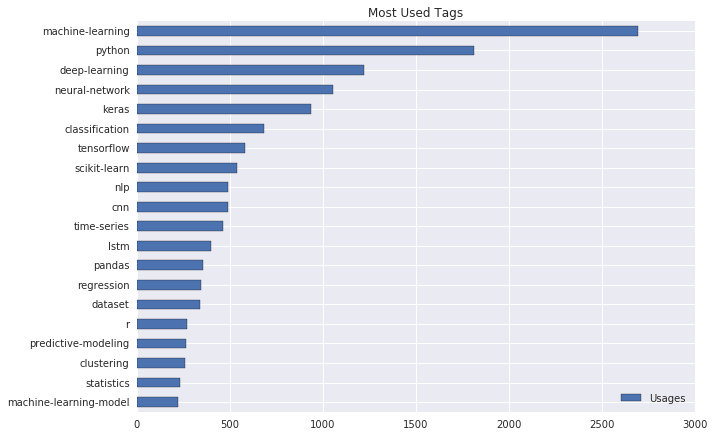

In [17]:
most_used_df = expanded_df['Tag'].value_counts().sort_values().tail(20).to_frame('Usages')
most_used_df.plot(kind='barh', title='Most Used Tags', figsize=(10,7))

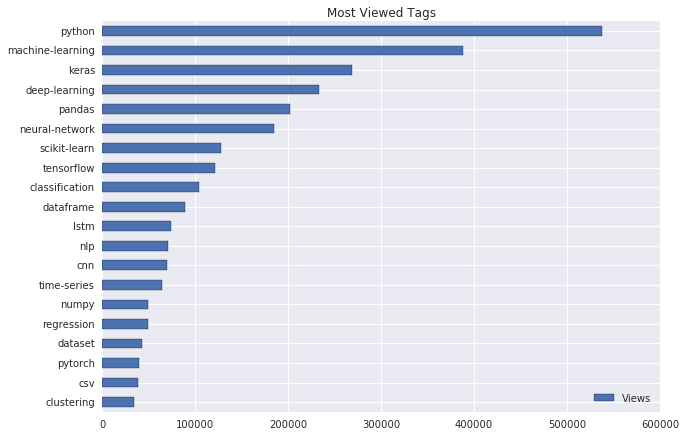

In [18]:
most_viewed_df = expanded_df[['Tag', 'ViewCount']].groupby('Tag').sum().sort_values(by='ViewCount').tail(20)
most_viewed_df = most_viewed_df.rename_axis(None, axis=0).rename(columns={'ViewCount': 'Views'})
most_viewed_df.plot(kind='barh', title='Most Viewed Tags', figsize=(10,7))

In [19]:
print('Most Used, but not Viewed: ', most_used_df.index[~most_used_df.index.isin(most_viewed_df.index)].values)
print('Most Viewed, but not Used: ', most_viewed_df.index[~most_viewed_df.index.isin(most_used_df.index)].values)

Most Used, but not Viewed:  ['machine-learning-model' 'statistics' 'predictive-modeling' 'r']
Most Viewed, but not Used:  ['csv' 'pytorch' 'numpy' 'dataframe']


The most popular generic tags in 2019:

* Python
* Neural Network
* Machine Learning
* Deep Learning

The most popular frameworks in 2019:

* Keras
* TensorFlow
* scikit-learn

## Relation Between Tags

The idea behind this analysis is to determine which pair of tags is used the most. We will need a pivot table with tag columns.

In [20]:
%time
relations_pivot_df = expanded_df.pivot(index='Id', columns='Tag', values='Tag').notnull()

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.68 µs


In [21]:
relations_pivot_df.loc[[44419, 44420], (relations_pivot_df.loc[[44419, 44420]] == True).any()]

Tag,data-mining,linear-regression,machine-learning,regression,regularization
Id,,,,,
44419,True,False,True,False,False
44420,False,True,True,True,True


Now we are ready to create the final DataFrame where each column and row represents a tag. For each column take rows flagged with selected tag. Count each column values within a result slice. This will lead to number of related tags for selected tag.

In [22]:
%time
relations_df = pd.DataFrame()
for col in relations_pivot_df.columns:
    relations_df[col] = relations_pivot_df[relations_pivot_df[col] == True].sum()

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.2 µs


In [23]:
relations_df.shape

(526, 526)

That is a lot of columns. It would be better to keep only the most used ones.

In [24]:
relations_df = relations_df.loc[most_used_df.index, most_used_df.index]

In [25]:
relations_df

,machine-learning-model,statistics,clustering,predictive-modeling,r,dataset,regression,pandas,lstm,time-series,cnn,nlp,scikit-learn,tensorflow,classification,keras,neural-network,deep-learning,python,machine-learning
machine-learning-model,224,3,3,21,7,12,8,4,5,7,4,4,18,9,21,17,10,19,37,139
statistics,3,234,3,16,16,17,16,3,1,22,1,3,6,0,19,3,11,12,35,89
clustering,3,3,257,0,16,5,2,5,3,20,0,9,24,0,12,0,8,2,45,61
predictive-modeling,21,16,0,265,13,7,28,4,13,31,6,1,12,6,27,11,13,32,35,123
r,7,16,16,13,268,6,10,2,3,22,2,4,1,1,10,10,9,5,24,63
dataset,12,17,5,7,6,340,6,14,7,6,11,11,9,9,28,13,20,32,53,99
regression,8,16,2,28,10,6,347,6,11,24,6,2,37,9,34,31,42,21,59,119
pandas,4,3,5,4,2,14,6,354,7,19,1,3,37,3,3,3,1,1,244,62
lstm,5,1,3,13,3,7,11,7,402,87,24,19,2,43,20,133,69,103,61,71
time-series,7,22,20,31,22,6,24,19,87,466,8,0,12,9,25,51,33,44,105,131


Replace main diagonal with NaN to prevent skewness and spread of results.

In [26]:
for col in relations_df.columns:
    relations_df.loc[col, col] = pd.np.NaN

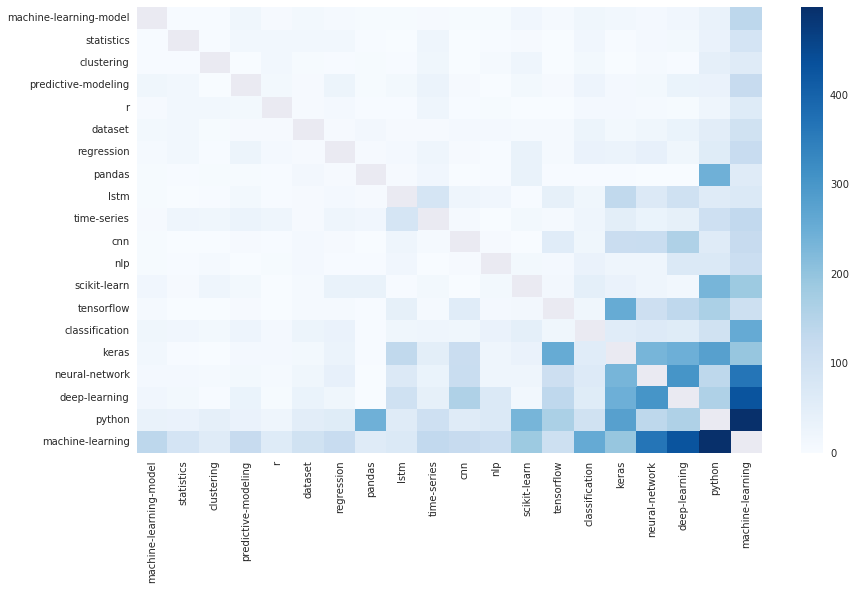

In [27]:
plt.figure(figsize=(14,8))
sns.heatmap(relations_df, cmap='Blues')

## Is Deep Learning Just a Fad?

We need to track the interest in deep learning across time. Is it another trend like Big Data?

In [28]:
all_df = pd.read_csv('all_questions.csv', parse_dates=['CreationDate'])
all_df['Tags'] = all_df['Tags'].str[1:-1].str.split('><')
all_df.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]"
1,45418,2019-02-12 00:50:39,[neural-network]
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]"
3,45426,2019-02-12 04:51:49,[keras]
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode..."


To classify deep learning related questions we will use list of tags below and check if any row tag exists in this list.

In [29]:
deep_learning_tags = ['deep-learning', 'neural-network', 'tensorflow', 'keras', 'cnn', 'lstm']
all_df['IsDeepLearning'] = all_df['Tags'].apply(lambda row_tags: any(tag in deep_learning_tags for tag in row_tags))

In [30]:
all_df['CreationDate'].describe()

count                   21576
unique                  21575
top       2019-09-25 18:32:47
freq                        2
first     2014-05-13 23:58:30
last      2020-01-19 03:01:03
Name: CreationDate, dtype: object

In order to analyze 5 years of 'deep learning' data we will stick with quarter analysis for full years only (2015 - 2019).

In [31]:
all_df = all_df[all_df['CreationDate'].dt.year.between(2015, 2019)]

In [32]:
year_2d_s = all_df['CreationDate'].dt.year.astype(str).str[2:]
quarter_s = (((all_df['CreationDate'].dt.month - 1) // 3) + 1).astype(str)
all_df['YearQuarter'] = year_2d_s + 'Q' + quarter_s
all_df.sample(5)

,Id,CreationDate,Tags,IsDeepLearning,YearQuarter
21365,36453,2018-08-04 09:32:14,"[python, keras, time-series, rnn, recurrent-ne...",True,18Q3
13531,43839,2019-01-11 12:10:09,"[neural-network, deep-learning]",True,19Q1
7788,27954,2018-02-18 14:59:58,"[autoencoder, distance]",False,18Q1
5100,47613,2019-03-19 13:25:41,"[r, nlp, stanford-nlp]",False,19Q1
173,55480,2019-07-11 05:47:38,"[machine-learning, neural-network, deep-learni...",True,19Q3


To track deep learning questions rate let's create appropriate column 'DeepLearningRate', which shows percentage of deep learning questions to the all questions.

In [33]:
deep_df = all_df.groupby('YearQuarter').agg({'IsDeepLearning': ['sum', 'count']})
deep_df.columns = ['DeepLearningQuestions', 'AllQuestions']
deep_df['DeepLearningRate'] = deep_df['DeepLearningQuestions'] / deep_df['AllQuestions']
deep_df.head()

,DeepLearningQuestions,AllQuestions,DeepLearningRate
YearQuarter,,,
15Q1,14.0,190,0.073684
15Q2,20.0,284,0.070423
15Q3,28.0,311,0.090032
15Q4,52.0,382,0.136126
16Q1,79.0,516,0.153101


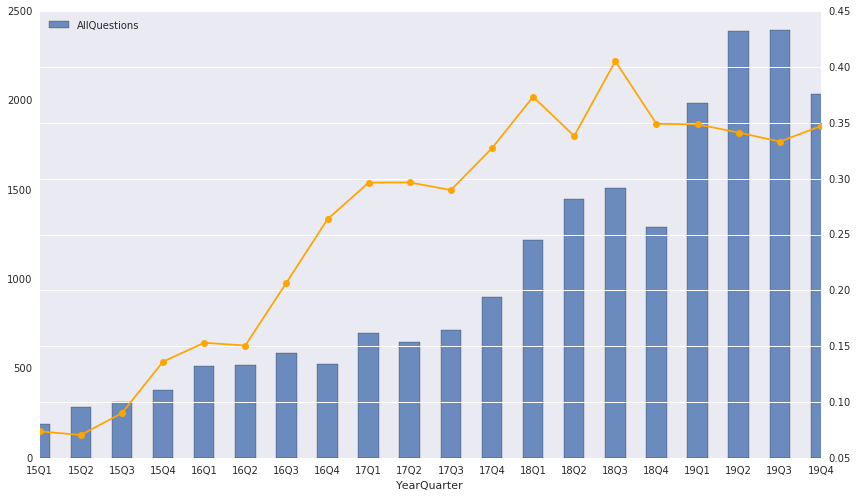

In [34]:
ax = deep_df[['AllQuestions']].plot(kind='bar', figsize=(14, 8), alpha=0.8)
deep_df['DeepLearningRate'].plot(kind='line', ax=ax, secondary_y=True, marker='o', color='orange')

Deep learning spike falls on 2017 year, and still does not decrease. There is no doubt that this is a rather **`deep`** topic that is actively developing.